In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset
file_path = '/content/Melbourne_housing_FULL.csv'
df = pd.read_csv(file_path)

# Melihat beberapa data awal
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [12]:
# Menghapus baris yang memiliki nilai kosong (NaN)
df_clean = df.dropna()

# Memilih fitur yang akan digunakan dan target
# Misalnya kita memilih 'Rooms' dan 'Price' untuk prediksi
X = df_clean[['Rooms']]  # Fitur (contoh: jumlah kamar)
y = df_clean['Price']    # Target (contoh: harga rumah)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Membuat model regresi linear
linear_model = LinearRegression()

# Melatih model dengan data latih
linear_model.fit(X_train, y_train)

# Memprediksi harga rumah pada data uji
y_pred_linear = linear_model.predict(X_test)

# Menghitung mean squared error (MSE) sebagai evaluasi
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f"Mean Squared Error untuk Linear Regression: {mse_linear}")


Mean Squared Error untuk Linear Regression: 299965500993.7933


In [14]:
# Mengubah target menjadi biner (contoh: apakah harga rumah di atas 1 juta)
threshold = 1000000
y_binarized = (df_clean['Price'] > threshold).astype(int)

# Membagi dataset untuk regresi logistik
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Membuat model regresi logistik
logistic_model = LogisticRegression()

# Melatih model
logistic_model.fit(X_train_log, y_train_log)

# Memprediksi data uji
y_pred_logistic = logistic_model.predict(X_test_log)

# Menghitung akurasi
accuracy_logistic = accuracy_score(y_test_log, y_pred_logistic)

print(f"Akurasi untuk Logistic Regression: {accuracy_logistic}")


Akurasi untuk Logistic Regression: 0.6777277840269966


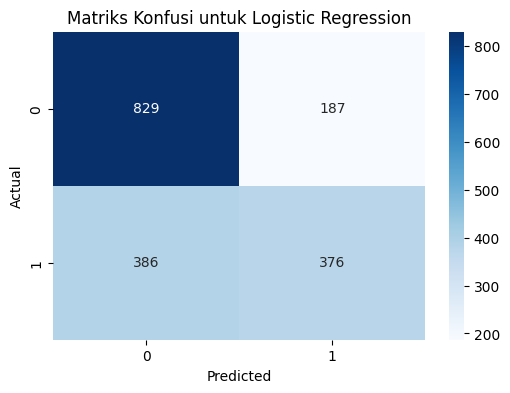

In [15]:
# Menghitung matriks konfusi
conf_matrix = confusion_matrix(y_test_log, y_pred_logistic)

# Menampilkan matriks konfusi menggunakan heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriks Konfusi untuk Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

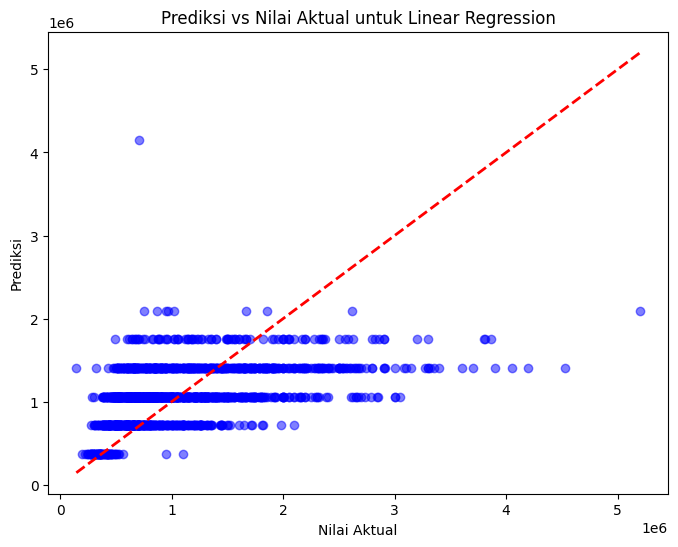

In [16]:
# Membuat scatter plot untuk membandingkan nilai aktual dan prediksi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Prediksi vs Nilai Aktual untuk Linear Regression')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.show()
